In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Загрузка данных

In [2]:
%%capture
!wget https://www.dropbox.com/s/64ol9q9ssggz6f1/data_ford_price.xlsx

In [3]:
data = pd.read_excel('data/data_ford_price.xlsx') 

In [4]:
data.shape

(7017, 12)

In [5]:
y = data['price']
X = data.drop(columns='price')

# Предобработка

In [6]:
# lr = LinearRegression()
# lr.fit(X,y)

_______________________
Сторонний пример

In [7]:
from sklearn.preprocessing  import LabelBinarizer
 
lb = LabelBinarizer()
 
education = ['нет', 'начальное', 'среднее', 'BSc', 'MSc', 'начальное', 'PhD']
lb.fit(education)
 
print('категории:', lb.classes_) 
lb.transform(['нет', 'MSc'])

категории: ['BSc' 'MSc' 'PhD' 'начальное' 'нет' 'среднее']


array([[0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0]])

<Axes: >

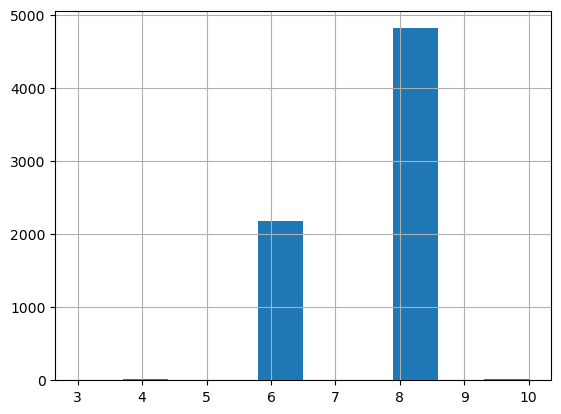

In [8]:
data['cylinders'].hist()

<Axes: >

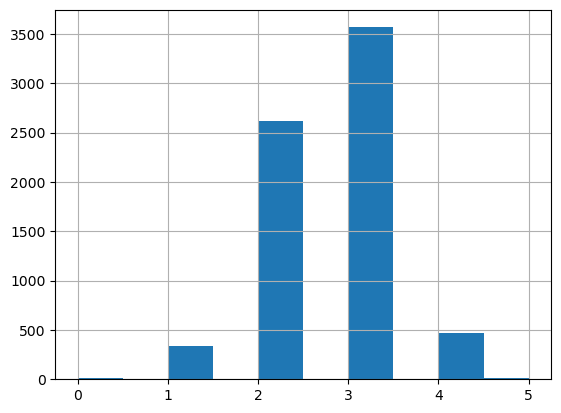

In [11]:
data['condition'].hist()

___________________________________

In [9]:
columns_to_change = ['cylinders', 'title_status', 'transmission', 'drive', 'size']
 
for column in columns_to_change:
 print('Число уникальных значений призкака {}: '.format(column), data[column].nunique())

Число уникальных значений призкака cylinders:  6
Число уникальных значений призкака title_status:  5
Число уникальных значений призкака transmission:  3
Число уникальных значений призкака drive:  3
Число уникальных значений призкака size:  4


In [10]:
from sklearn.preprocessing import OneHotEncoder
 
one_hot_encoder = OneHotEncoder()
 
# 'учим' и сразу применяем преобразование к выборке, результат переводим в массив
data_onehot = one_hot_encoder.fit_transform(data[columns_to_change]).toarray() 
# запишем полученные названия новых колонок в отдельную переменную
column_names = one_hot_encoder.get_feature_names_out(columns_to_change)
print(column_names)

['cylinders_3' 'cylinders_4' 'cylinders_5' 'cylinders_6' 'cylinders_8'
 'cylinders_10' 'title_status_clean' 'title_status_lien'
 'title_status_missing' 'title_status_rebuilt' 'title_status_salvage'
 'transmission_automatic' 'transmission_manual' 'transmission_other'
 'drive_4wd' 'drive_fwd' 'drive_rwd' 'drive_nan' 'size_compact'
 'size_full-size' 'size_mid-size' 'size_sub-compact' 'size_nan']
